In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

np.random.seed(71)


coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']

In [2]:
DB5P1 = pd.read_csv("../data/DB5.csv")
DB2P8 = pd.read_csv("../data/DB2P8.csv")

DB5 = DB5P1[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB5["id"] = DB5P1["id"]

DB2 = DB2P8[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB2["id"] = DB2P8["id"]

data = DB5.copy()

In [3]:
def compute_OLS_regression(data):
    # Adding a column for the intercept
    _df = data[coeffs]; _df.insert(
        loc = 0, 
        column = "intercept", 
        value = np.ones(len(_df))
    )
    X = _df.to_numpy()
    Y = data[["TAUTH"]].to_numpy()
    model = sm.OLS(Y,X)
    regression = model.fit()
    return regression
    
regression = compute_OLS_regression(data)
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:49:29   Log-Likelihood:                 1140.9
No. Observations:                6250   AIC:                            -2264.
Df Residuals:                    6241   BIC:                            -2203.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5185      0.029    -88.236      0.000      -2.574      -2.463
x1             1.1343      0.016     69.337      0.000       1.102       1.166
x2             0.0724      0.014      5.076      0.000       0.044       0.100
x3             0.1749      0.010     18.246      0.000       0.156       0.194
x4            -0.6827      0.007   -100.092      0.000      -0.696      -0.669
x5             1.4480      0.026     56.745      0.000       1.398       1.498
x6             0.2802      0.029      9.726      0.000       0.224       0.337
x7             0.0636      0.037      1.721      0.085      -0.009       0.136
x8             0.2140      0.017     12.538      0.000       0.181       0.247
==============================================================================
Omnibus:                      103.850   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.017
Skew:                          -0.148   Prob(JB):                     1.21e-37
Kurtosis:                       3.752   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Multiplication Factor 
γ = 100
# Re-scal=ed Covariance Matrix
COVM = pd.DataFrame(γ * regression.cov_params(), 
                    columns= ["intercept"] + coeffs, 
                    index  = ["intercept"] + coeffs
                   )
COVM

,intercept,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
intercept,0.081470,-0.006213,0.017640,-0.004058,-0.004046,0.009079,-0.011518,0.058950,-0.018026
IP,-0.006213,0.026763,-0.016536,-0.005552,0.000189,-0.034605,-0.025154,-0.050333,-0.000457
BT,0.017640,-0.016536,0.020326,0.000742,-0.002162,0.019989,0.023099,0.041455,-0.004041
NEL,-0.004058,-0.005552,0.000742,0.009191,-0.002711,0.015865,0.001103,0.014157,-0.002343
PLTH,-0.004046,0.000189,-0.002162,-0.002711,0.004652,-0.007419,-0.005033,-0.007224,0.000873
RGEO,0.009079,-0.034605,0.019989,0.015865,-0.007419,0.065112,0.031308,0.077594,-0.000990
KAREA,-0.011518,-0.025154,0.023099,0.001103,-0.005033,0.031308,0.082974,0.039296,-0.007695
EPS,0.058950,-0.050333,0.041455,0.014157,-0.007224,0.077594,0.039296,0.136531,-0.007435
MEFF,-0.018026,-0.000457,-0.004041,-0.002343,0.000873,-0.000990,-0.007695,-0.007435,0.029133


In [5]:
MEAN = pd.DataFrame(regression.params).T; MEAN.columns = columns = ["intercept"] + coeffs
MEAN

,intercept,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
0,-2.518511,1.13432,0.072368,0.174924,-0.68271,1.447975,0.280173,0.063607,0.214009


In [6]:
N = 5  #4000
def get_rand_sample(μ, σ, N):
    s = np.random.normal(μ, σ, N)
    return s

In [7]:
params = ["intercept"] + coeffs
M = np.zeros((N, len(params)))

for i, parameter in enumerate(params):
    mu, sigma = MEAN[parameter][0], np.sqrt(COVM[parameter][parameter])
    M[:, i] = get_rand_sample(mu, sigma, N)
    
PARAM_SAMPLING = pd.DataFrame(M, columns=params)    

In [8]:
PARAM_SAMPLING

,intercept,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
0,-2.641418,1.230137,0.026317,0.228358,-0.693672,1.302865,0.601566,-0.659189,0.241311
1,-2.859294,1.326923,0.273809,0.167970,-0.663986,1.434543,-0.033321,-0.067103,0.407103
2,-2.645328,0.976449,-0.029235,0.156642,-0.708202,1.159722,0.292395,0.612127,0.226759
3,-2.378818,1.170029,-0.121841,0.286298,-0.636772,1.675528,0.464921,0.436716,0.074471
4,-2.647399,0.992623,-0.170853,0.032837,-0.729043,1.643657,0.733338,0.460467,0.335006


In [9]:
def get_hat_τ(X, parameters):
    I, B, n_e, P, R, κ, ε, M_eff = X 
    α0, αI, αB, αn, αP, αR, ακ, αε, αM_eff = parameters
    hat_τ = α0 + αI*I + αB*B + αn*n_e + αP*P + αR*R + ακ*κ + αε*ε + αM_eff*M_eff 
    return hat_τ

In [10]:
data_ = DB5.copy()
data_

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,id
0,-2.975930,-1.217734,0.790728,1.332102,0.625938,0.527093,-0.025523,-1.418447,0.405465,HDULEH
1,-3.015527,-1.220102,0.790728,1.317480,0.705076,0.521172,-0.027988,-1.409604,0.405465,NAC6N1
2,-2.752786,-1.213686,0.790728,1.226712,0.123986,0.526502,-0.010556,-1.432100,0.405465,U2T1C7
3,-2.660547,-1.217734,0.790728,1.328400,0.319181,0.526502,-0.025933,-1.417369,0.405465,422XQB
4,-2.965979,-1.223495,0.790274,1.347294,0.709513,0.521766,-0.031387,-1.406800,0.405465,WZ9FED
...,...,...,...,...,...,...,...,...,...,...
6245,-4.094745,-1.515037,0.674474,1.593105,-0.486946,-0.189467,0.102557,-1.347185,0.693147,NGC85H
6246,-4.068677,-1.514582,0.668854,1.631004,-0.452871,-0.179605,0.096219,-1.354725,0.693147,ID1IP4
6247,-3.671826,-1.515037,0.668342,1.674664,-0.977634,-0.180324,0.098034,-1.355399,0.693147,K19A5H
6248,-1.753886,-0.020815,1.567574,1.252763,1.631591,0.897719,-0.000300,-1.116746,0.693147,D26CA1


In [11]:
for p in range(len(PARAM_SAMPLING)):
    data_[f"τ_{p}"] = np.zeros(len(DB5))
    for observation in range(len(DB5)):
        data_.iloc[observation, len(data_.columns)-1] = get_hat_τ( data_.loc[observation].loc[coeffs].values,
                                                PARAM_SAMPLING.loc[p].values
                                              )

In [12]:
data_

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,id,τ_0,τ_1,τ_2,τ_3,τ_4
0,-2.975930,-1.217734,0.790728,1.332102,0.625938,0.527093,-0.025523,-1.418447,0.405465,HDULEH,-2.544344,-3.433251,-4.264636,-3.635117,-4.073513
1,-3.015527,-1.220102,0.790728,1.317480,0.705076,0.521172,-0.027988,-1.409604,0.405465,NAC6N1,-2.620517,-3.500401,-4.327458,-3.699671,-4.141506
2,-2.752786,-1.213686,0.790728,1.226712,0.123986,0.526502,-0.010556,-1.432100,0.405465,U2T1C7,-2.198006,-3.112724,-3.926375,-3.340919,-3.703292
3,-2.660547,-1.217734,0.790728,1.328400,0.319181,0.526502,-0.025933,-1.417369,0.405465,422XQB,-2.334127,-3.231096,-4.048114,-3.441551,-3.850770
4,-2.965979,-1.223495,0.790274,1.347294,0.709513,0.521766,-0.031387,-1.406800,0.405465,WZ9FED,-2.624093,-3.502189,-4.327819,-3.697237,-4.147278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,-4.094745,-1.515037,0.674474,1.593105,-0.486946,-0.189467,0.102557,-1.347185,0.693147,NGC85H,-2.915634,-3.996669,-4.407212,-4.273951,-4.483513
6246,-4.068677,-1.514582,0.668854,1.631004,-0.452871,-0.179605,0.096219,-1.354725,0.693147,ID1IP4,-2.916198,-3.999000,-4.419831,-4.273298,-4.497609
6247,-3.671826,-1.515037,0.668342,1.674664,-0.977634,-0.180324,0.098034,-1.355399,0.693147,K19A5H,-2.542187,-3.645020,-4.042498,-3.927768,-4.114124
6248,-1.753886,-0.020815,1.567574,1.252763,1.631591,0.897719,-0.000300,-1.116746,0.693147,D26CA1,-1.398644,-1.685680,-3.156137,-2.206521,-2.890941


In [38]:
hat_τ = data_[data_.columns[len(params) + 1:]]
residuals = hat_τ.sub( data_["TAUTH"], axis=0 )
residuals_sqr = residuals.apply(np.square)
sum_res = residuals_sqr.sum()
MSRE = (sum_res.div(len(data_))).apply(np.sqrt)
MSRE

τ_0    0.843091
τ_1    0.274145
τ_2    1.169347
τ_3    0.262362
τ_4    0.752358
dtype: float64

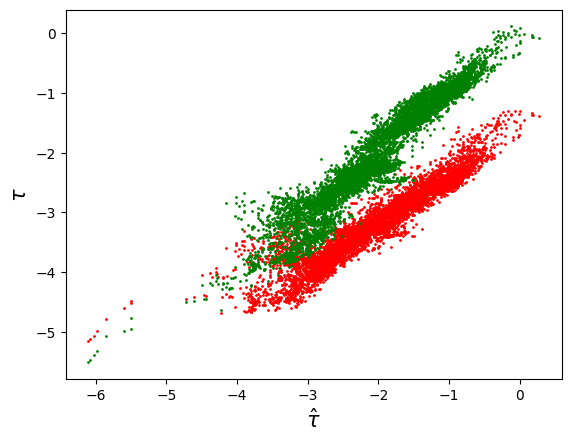

In [42]:
plt.scatter(data_["TAUTH"], data_["τ_2"], s=1, c="r")
plt.scatter(data_["TAUTH"], data_["τ_3"], s=1, c="g")
plt.xlabel("$\\hat{\\tau}$", fontsize=15);
plt.ylabel("$\\tau$", fontsize=15);